###4-1. 인구현황 데이터 분석 (필수)

연습문제/인구현황분석.ipynb  코드를 완성하세요.

1. 지역별 총인구수 Top5


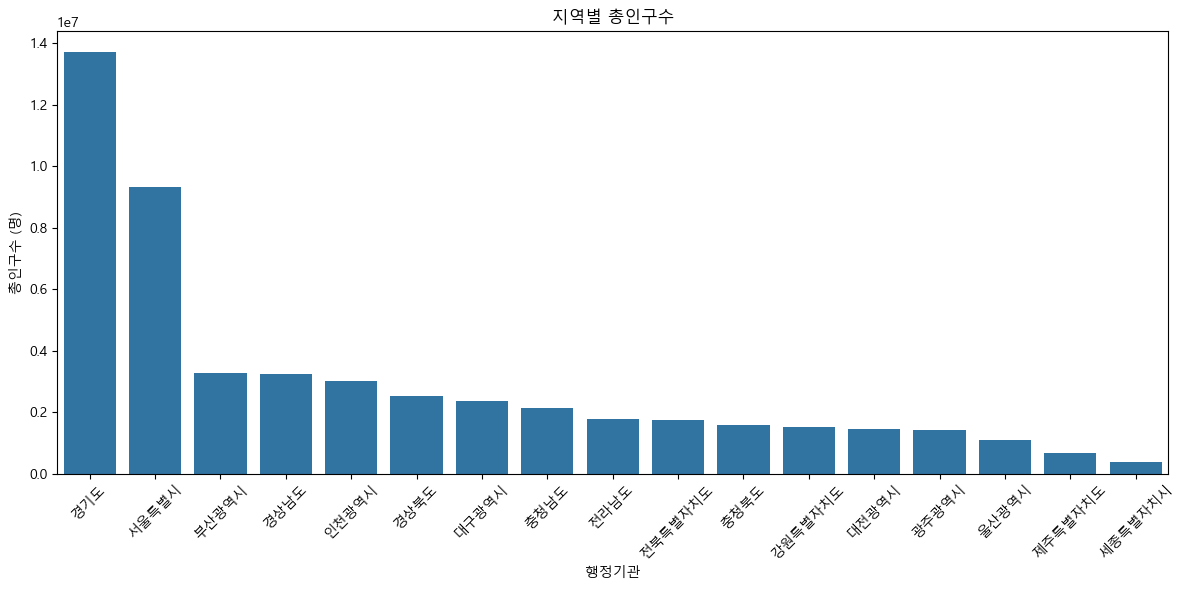

    행정기관      총인구수
0    경기도  11744210
1  서울특별시   9394807
2  부산광역시   3323591
3   경상남도   3144487
4  인천광역시   2766575


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# --- 한글 폰트 설정 (Windows 사용자 기준) ---
# 폰트 경로를 시스템에 맞게 지정해야 합니다.
try:
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
except FileNotFoundError:
    print("맑은 고딕 폰트를 찾을 수 없습니다. 기본 폰트로 설정됩니다. (한글이 깨질 수 있습니다)")
# ---------------------------------------------

# '인구현황.csv' 파일을 utf-8 인코딩으로 불러옵니다.
df = pd.read_csv('../data/인구현황.csv', encoding='utf-8')

# '전국' 행 제외
df = df[df['행정기관'] != '전국']

# --- 데이터 준비 ---
# 총인구수를 기준으로 내림차순 정렬합니다.
df_population_sorted = df.sort_values(by='총인구수', ascending=False)


# --- Plot 생성 ---
plt.figure(figsize=(12, 6)) # 그래프 크기 설정
sns.barplot(data=df_population_sorted, x='행정기관', y='총인구수')

plt.title('지역별 총인구수') # 그래프 제목
plt.ylabel('총인구수 (명)')
plt.xticks(rotation=45) # x축 레이블 45도 회전

plt.tight_layout() # 레이아웃 최적화
plt.show()
population_by_region = data.groupby('광역시도')['인구수'].sum().reset_index()

# 3. 합산된 인구수를 기준으로 내림차순 정렬하고 상위 5개를 선택하는 효율적인 코드입니다.
top5_df = population_by_region.sort_values(by='인구수', ascending=False).head(5)

# 4. 문제의 출력 형식에 맞게 컬럼명을 '행정기관', '총인구수'로 변경합니다.
top5_df.columns = ['행정기관', '총인구수']

# 5. 인덱스를 0부터 다시 시작하도록 초기화합니다.
top5_df.reset_index(drop=True, inplace=True)

# 6. 최종 결과를 출력합니다.
print(top5_df)

2. 세대당 인구수 높은 지역 Top5


C:\Users\user\AppData\Local\Temp\ipykernel_12572\2962116862.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_household_sorted, x='행정기관', y='세대당 인구',palette=my_palette)


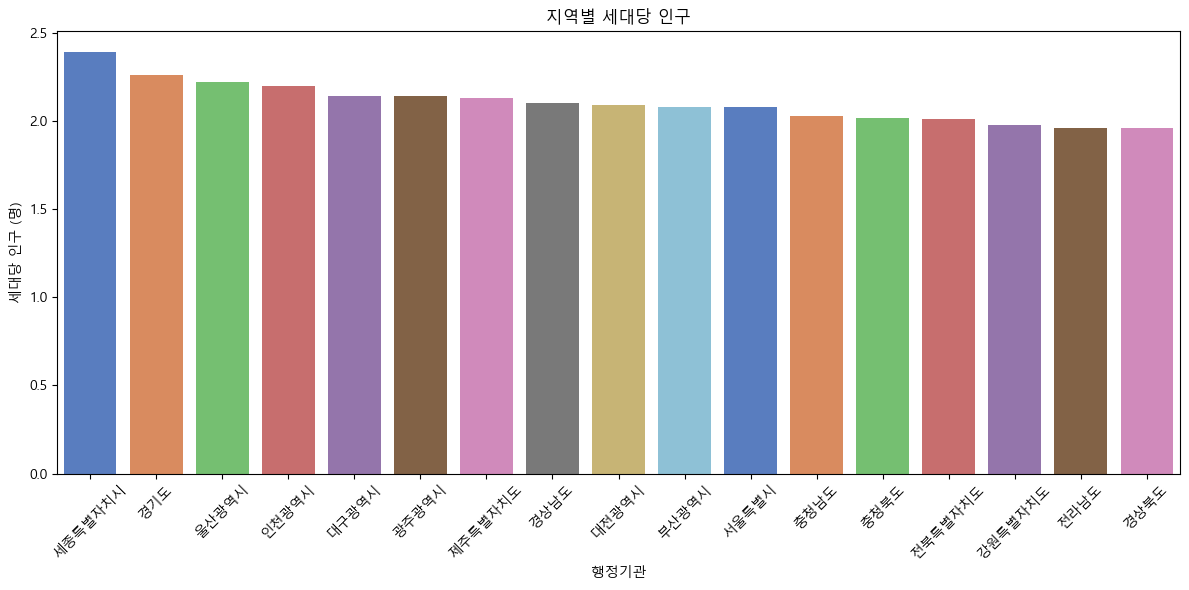

      행정기관  세대당 인구
0  세종특별자치시    2.39
1      경기도    2.26
2    울산광역시    2.22
3    인천광역시    2.20
4    대구광역시    2.14


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# --- 한글 폰트 설정 (Windows 사용자 기준) ---
try:
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
except FileNotFoundError:
    print("맑은 고딕 폰트를 찾을 수 없습니다. 기본 폰트로 설정됩니다. (한글이 깨질 수 있습니다)")
# ---------------------------------------------

# '인구현황.csv' 파일을 utf-8 인코딩으로 불러옵니다.
df = pd.read_csv('../data/인구현황.csv', encoding='utf-8')

# '전국' 행 제외
df = df[df['행정기관'] != '전국']

df['세대당 인구 (계산)'] = round(df['총인구수'] / df['세대수'], 2)

# 계산된 '세대당 인구'를 기준으로 내림차순 정렬 후 상위 5개를 선택합니다.
top5_household = df[['행정기관', '세대당 인구 (계산)']].sort_values(by='세대당 인구 (계산)', ascending=False).head(5)

# 컬럼명을 문제의 출력과 동일하게 변경합니다.
top5_household.columns = ['행정기관', '세대당 인구']

# 인덱스를 초기화합니다.
top5_household.reset_index(drop=True, inplace=True)

# --- Plot 생성 ---

plt.figure(figsize=(12, 6)) # 그래프 크기 설정
my_palette = sns.color_palette("muted", n_colors=len(df_population_sorted))
sns.barplot(data=df_household_sorted, x='행정기관', y='세대당 인구',palette=my_palette)

plt.title('지역별 세대당 인구') # 그래프 제목
plt.ylabel('세대당 인구 (명)')
plt.xticks(rotation=45) # x축 레이블 45도 회전

plt.tight_layout() # 레이아웃 최적화
plt.show()
print(top5_household)